# Order Delivery Time Prediction - Tejas Bokare

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")

In [3]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [4]:
df.isnull().mean()

market_id                   0.0
created_at                  0.0
actual_delivery_time        0.0
store_primary_category      0.0
order_protocol              0.0
total_items                 0.0
subtotal                    0.0
num_distinct_items          0.0
min_item_price              0.0
max_item_price              0.0
total_onshift_dashers       0.0
total_busy_dashers          0.0
total_outstanding_orders    0.0
distance                    0.0
dtype: float64

In [5]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [7]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [9]:
# Convert categorical features to category type

df['market_id'] = df['market_id'].astype("category")
df['store_primary_category'] = df['store_primary_category'].astype("category")
df['order_protocol'] = df['order_protocol'].astype("category")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [11]:
# Calculate time taken in minutes
df['time_taken'] = df['actual_delivery_time'] - df['created_at']

In [12]:
df['time_taken'] = df['time_taken'].dt.total_seconds() / 60 #time taken for delivery in minutes

In [13]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [15]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_at_hour'] = df['created_at'].dt.hour
df['created_day_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_at'].dt.dayofweek >= 5

df['isWeekend'] = df['isWeekend'].astype('int')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [17]:
# Drop unnecessary columns
drop_columns = ['created_at', 'actual_delivery_time']

df = df.drop(columns=drop_columns)

In [18]:
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  \
0                14.0                      21.0     34.44        47.0   
1                 2.0                       2.0     27.60        44.0   
2                 6.0                      18.0     11.56        55.0   
3                 6.0                       8.0     31.80        59.0   
4                 5.0                       7.0      8.20        46.0   

   created_at_hour  created_day_week  isWeekend  
0               22                 4          0  
1               21                 1          0  
2                0                 0          0  
3                3                 3          0  
4                2                 1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [19]:
# Define target variable (y) and features (X)
X = df.drop("time_taken", axis = 1)
y = df['time_taken']


In [20]:
X.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  created_at_hour  \
0                14.0                      21.0     34.44               22   
1                 2.0                       2.0     27.60               21   
2                 6.0                      18.0     11.56                0   
3                 6.0                       8.0     31.80                3   
4                 5.0                       7.0      8.20                2   

   created_day_week  isWeekend  
0                 4          0  
1                 1          0  
2                 0          0  
3                 3          0  
4                 1          0

In [21]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [22]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [23]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = ['total_items', 'num_distinct_items', 'subtotal', 'min_item_price', 'max_item_price', 
                  'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 
                  'created_at_hour']

categorical_columns = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend', 'created_day_week']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

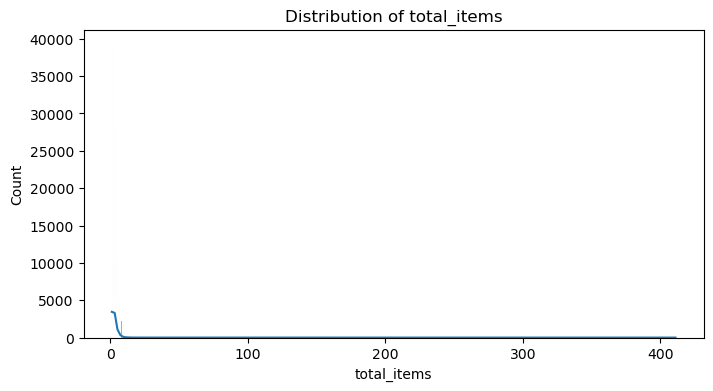

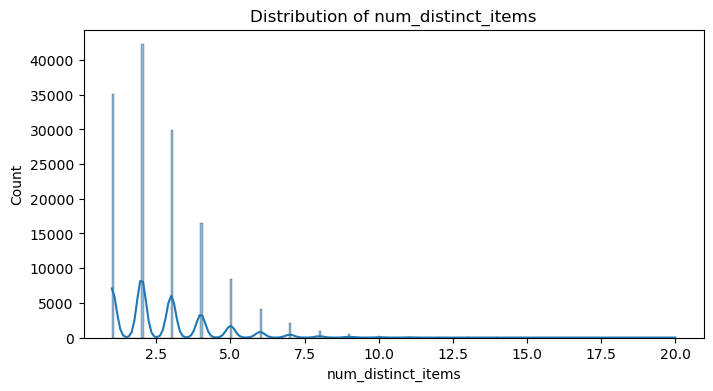

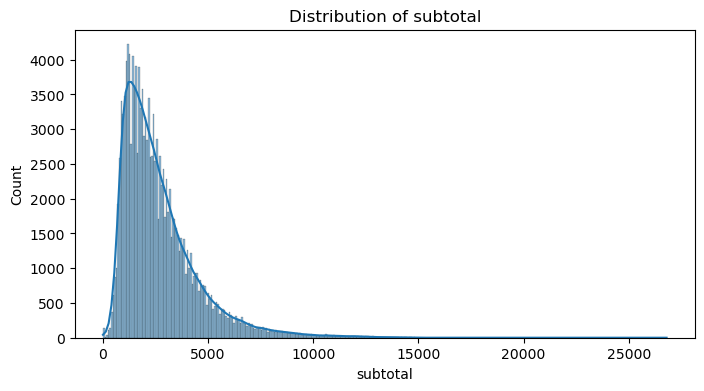

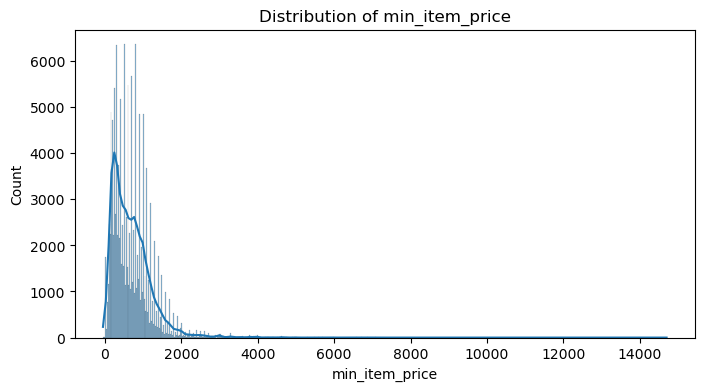

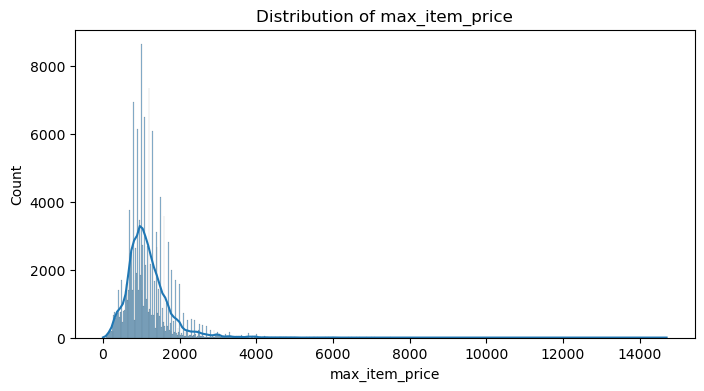

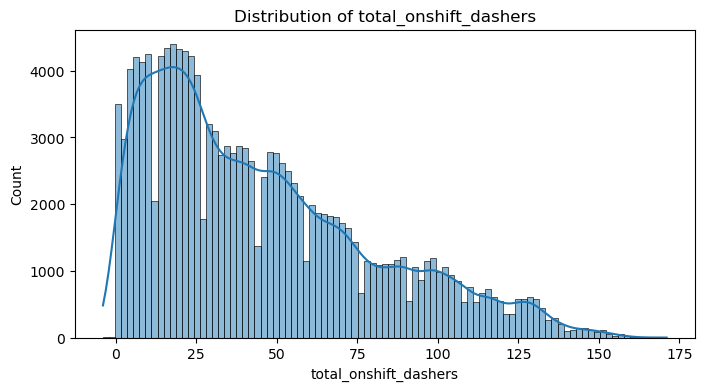

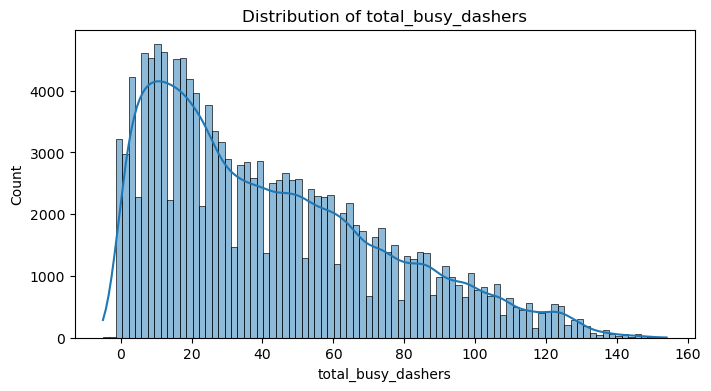

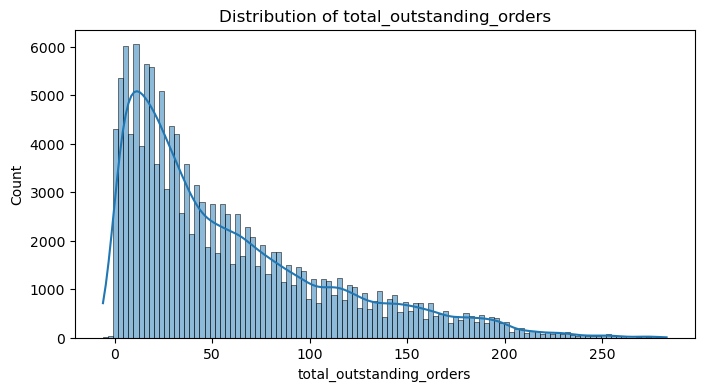

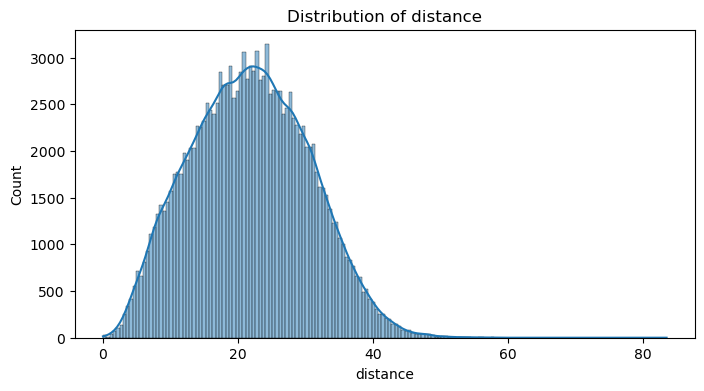

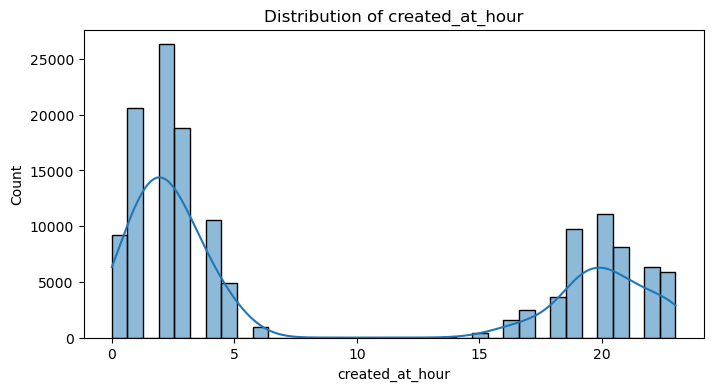

In [24]:
# Plot distributions for all numerical columns
for i in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(x=X_train[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

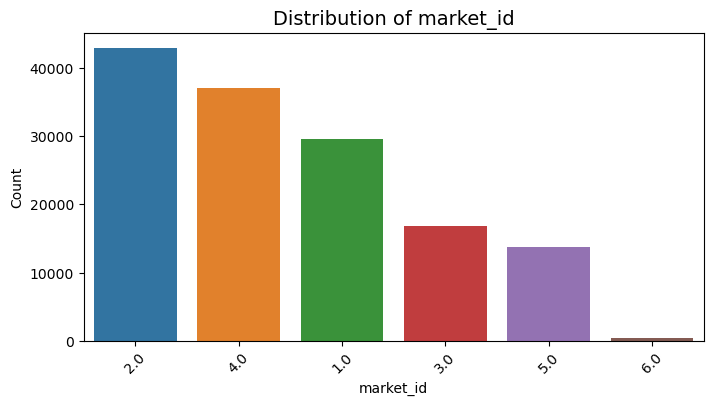

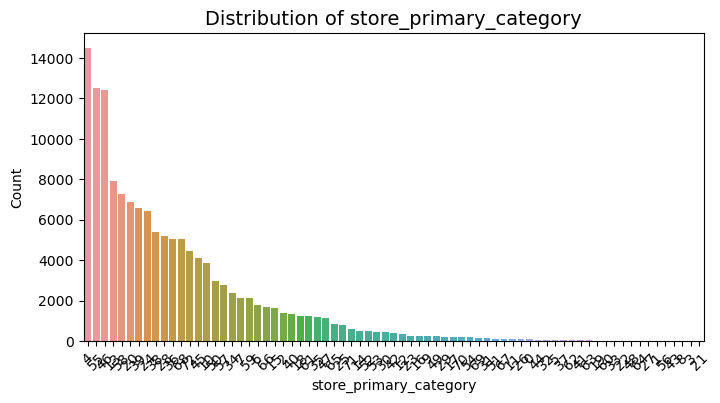

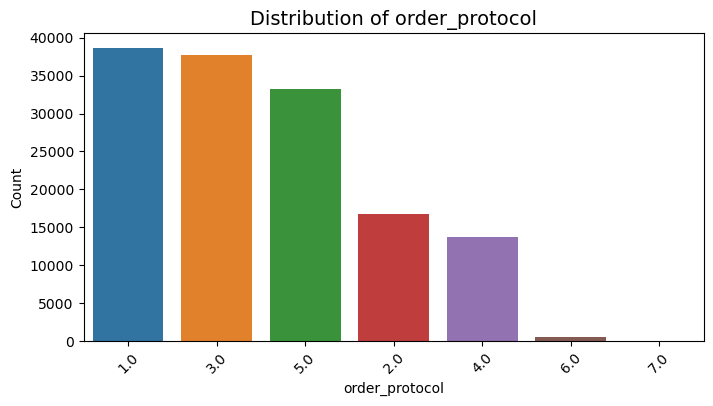

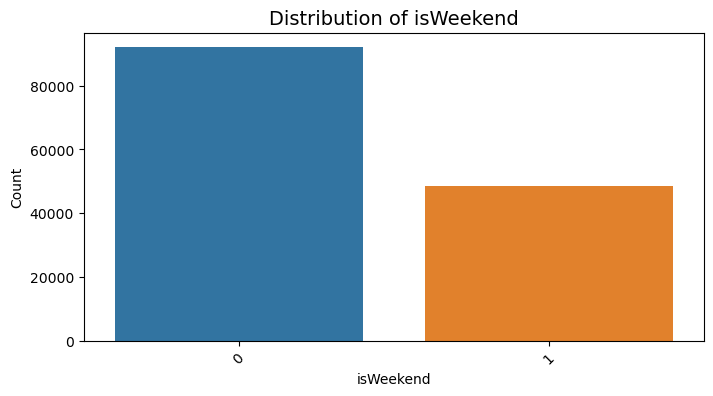

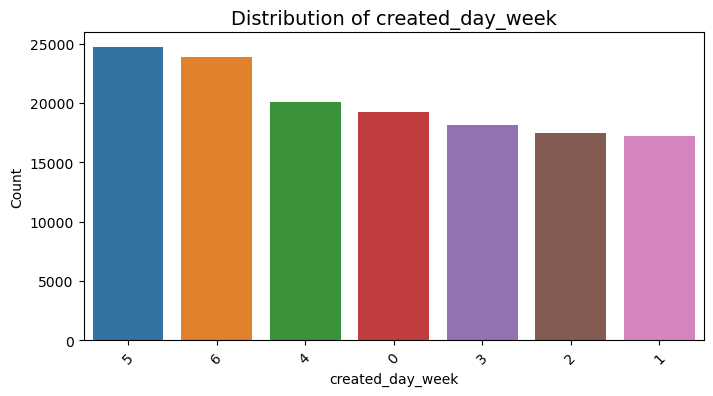

In [25]:
# Distribution of categorical columns
for i in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=i, data=X_train, order=X_train[i].value_counts().index)  # sorted by frequency
    plt.title(f'Distribution of {i}', fontsize=14)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # rotate x labels for better readability
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

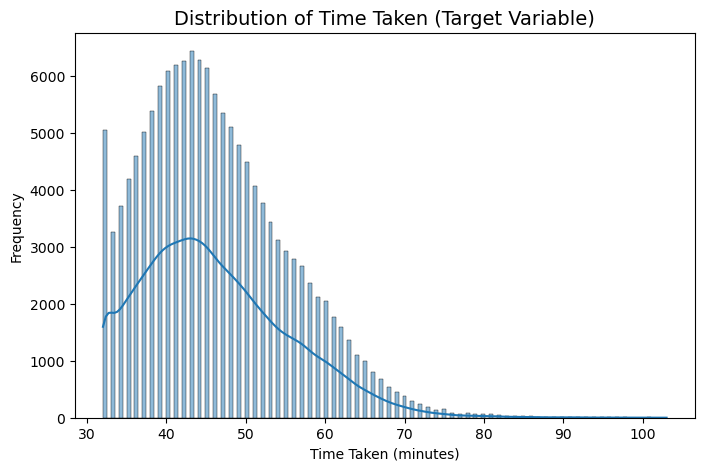

In [26]:
# Distribution of time_taken

plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Time Taken (Target Variable)', fontsize=14)
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

In [27]:
y_train.skew()

0.7666922255877637

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

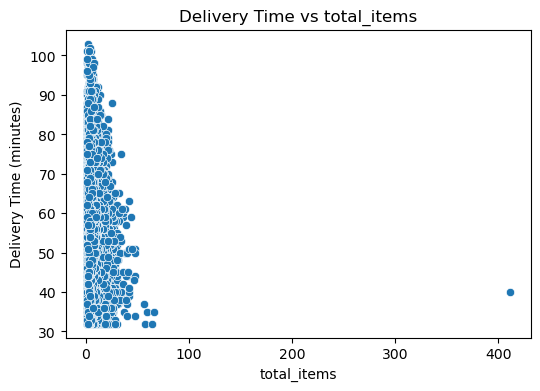

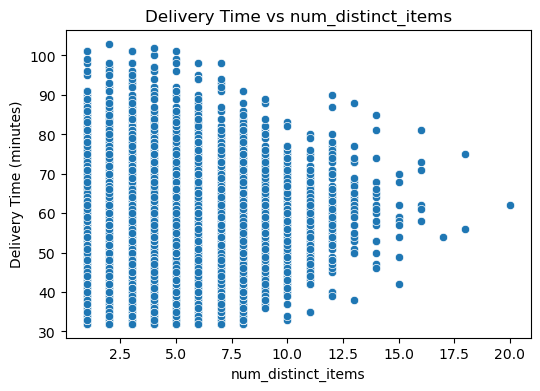

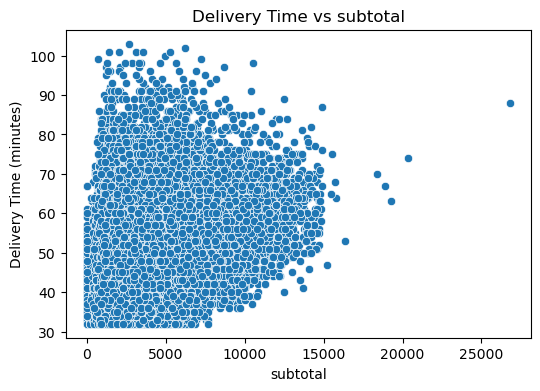

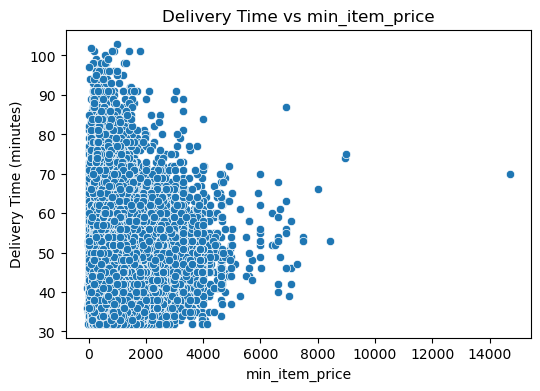

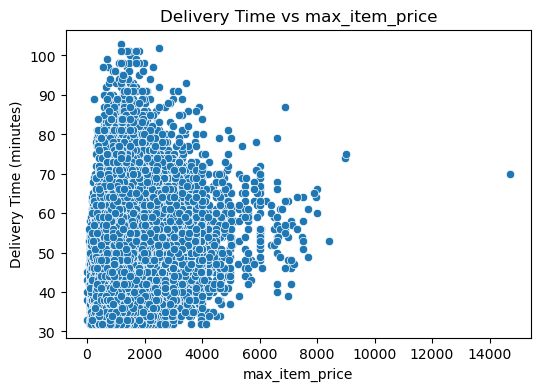

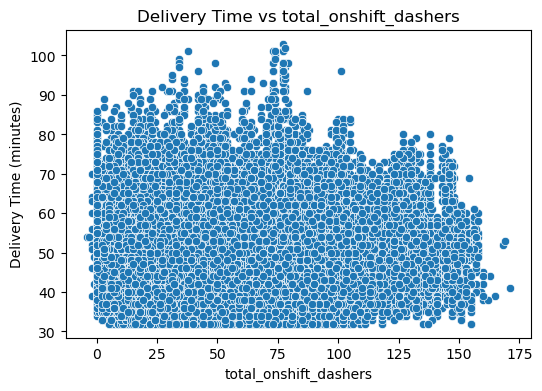

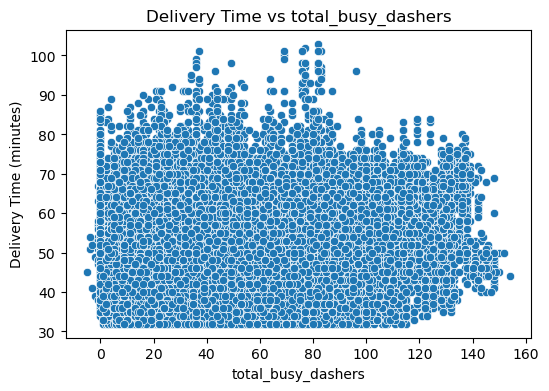

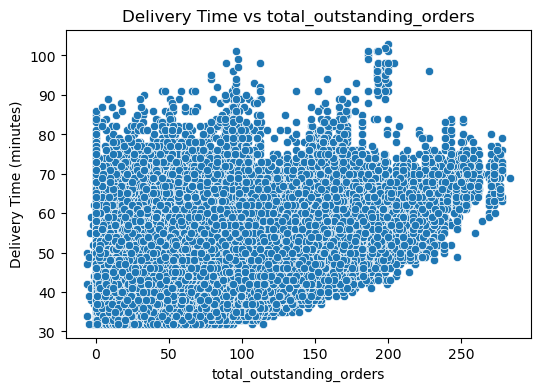

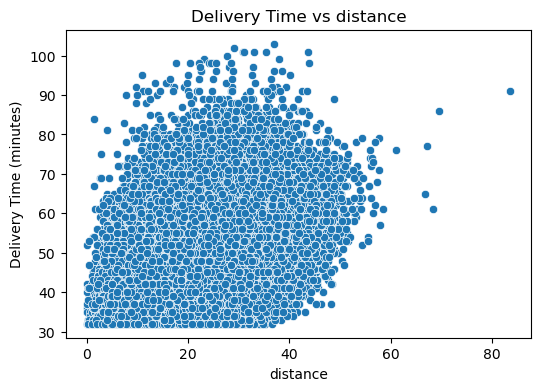

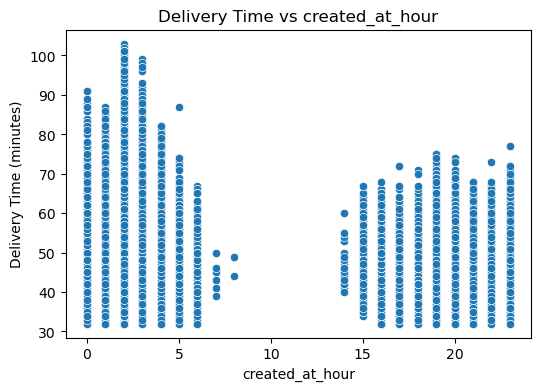

In [28]:
# Scatter plot to visualise the relationship between time_taken and other features
for i in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_train[i], y=y_train)
    plt.title(f'Delivery Time vs {i}')
    plt.xlabel(i)
    plt.ylabel('Delivery Time (minutes)')
    plt.show()


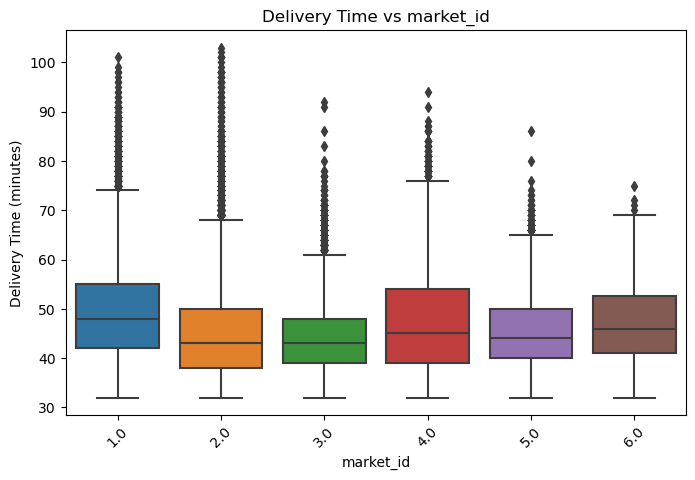

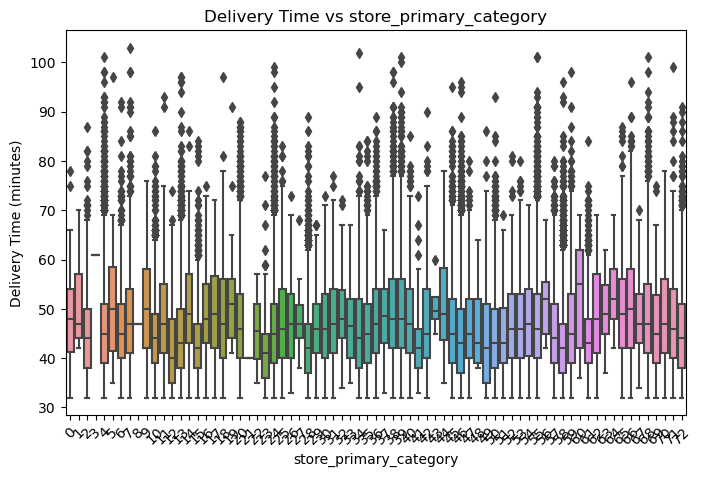

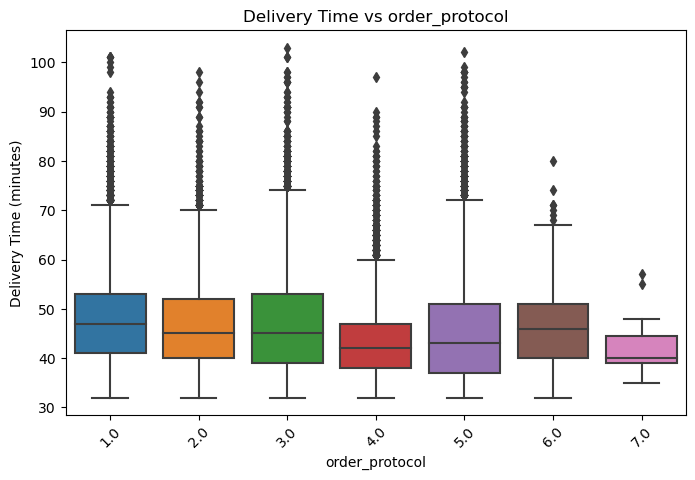

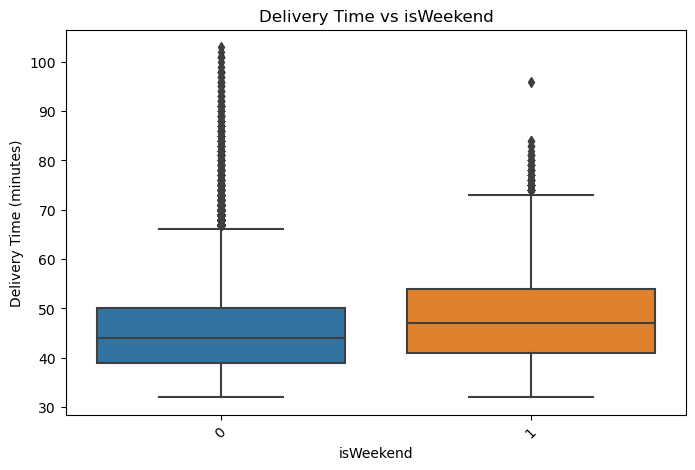

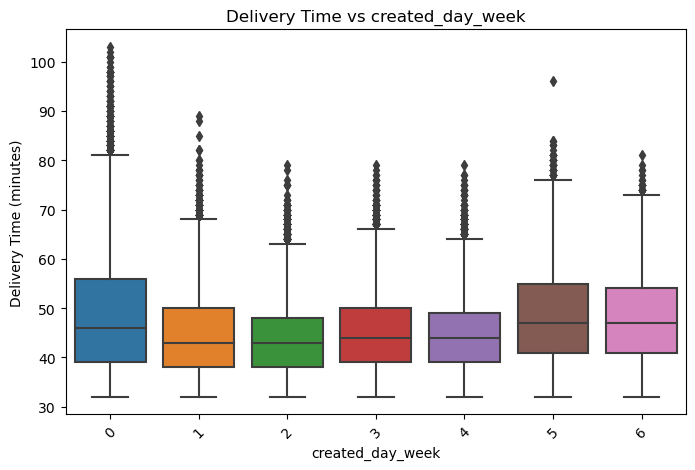

In [29]:
for i in categorical_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=X_train[i], y=y_train)
    plt.title(f'Delivery Time vs {i}')
    plt.xlabel(i)
    plt.ylabel('Delivery Time (minutes)')
    plt.xticks(rotation=45)
    plt.show()

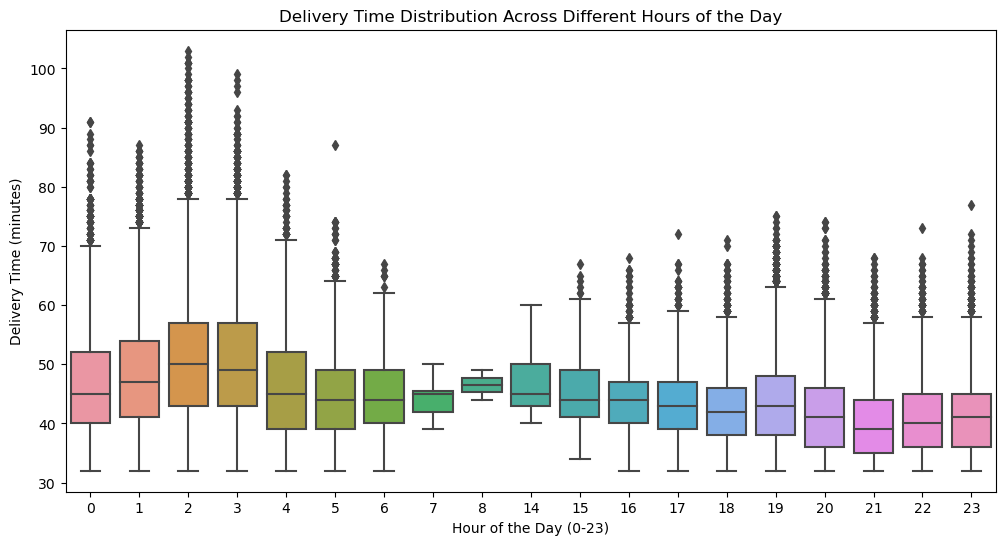

In [34]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12,6))
sns.boxplot(x=X_train['created_at_hour'], y=y_train)
plt.title('Delivery Time Distribution Across Different Hours of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

/var/folders/1t/ny42q4fx25lckm8dr89f6hm00000gn/T/ipykernel_1605/2861891824.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


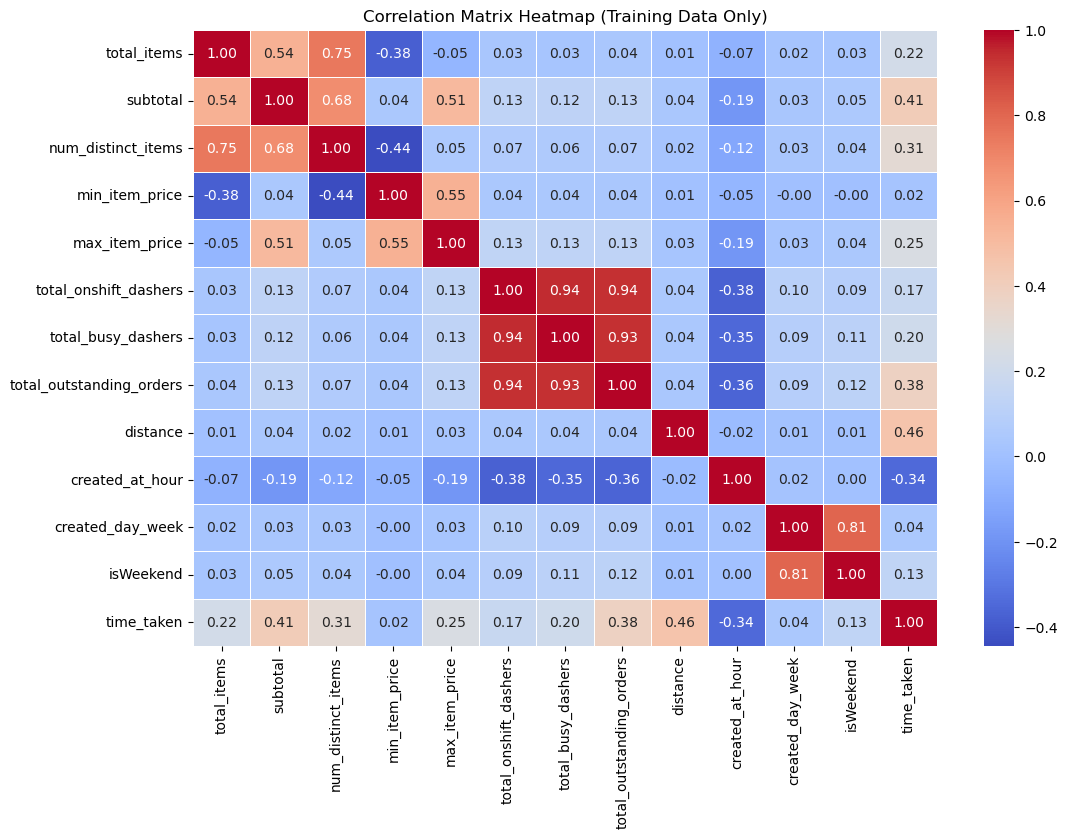

In [30]:
# Plot the heatmap of the correlation matrix
# Combine X_train and y_train into one DataFrame
train_df = X_train.copy()
train_df['time_taken'] = y_train

# Calculate correlation matrix on training data
corr_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Training Data Only)')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [31]:
# Drop 3-5 weakly correlated columns from training dataset

# Set a threshold for weak correlations (e.g., < 0.1 or > -0.1)
weak_corr_threshold = 0.1

# Get columns with weak correlation (absolute correlation < threshold)
weak_corr_columns = corr_matrix[abs(corr_matrix['time_taken']) < weak_corr_threshold].index.tolist()

# Drop those columns from X_train (and later from X_test)
X_train_clean = X_train.drop(columns=weak_corr_columns)


# Print columns that were dropped
print(f'Dropped columns with weak correlations: {weak_corr_columns}')

Dropped columns with weak correlations: ['min_item_price', 'created_day_week']


In [32]:
X_test_clean = X_test.drop(columns=weak_corr_columns) # Removing similar columns from Test data as well.

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [33]:
# Boxplot for time_taken
numerical_columns_clean = ['total_items', 'num_distinct_items', 'created_at_hour']


categorical_columns_clean = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


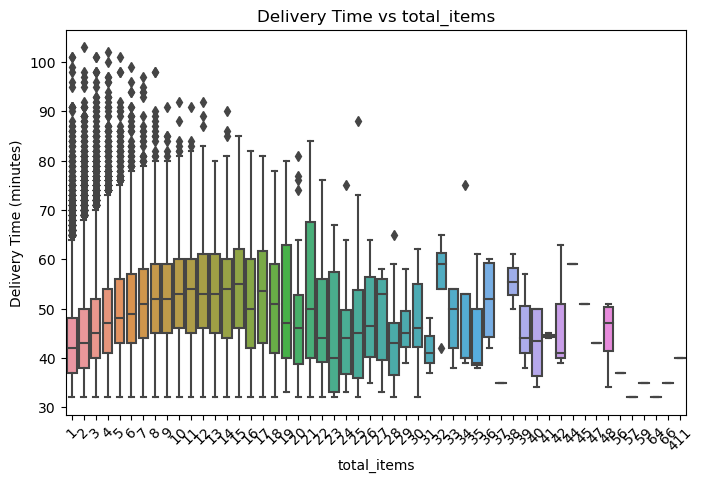

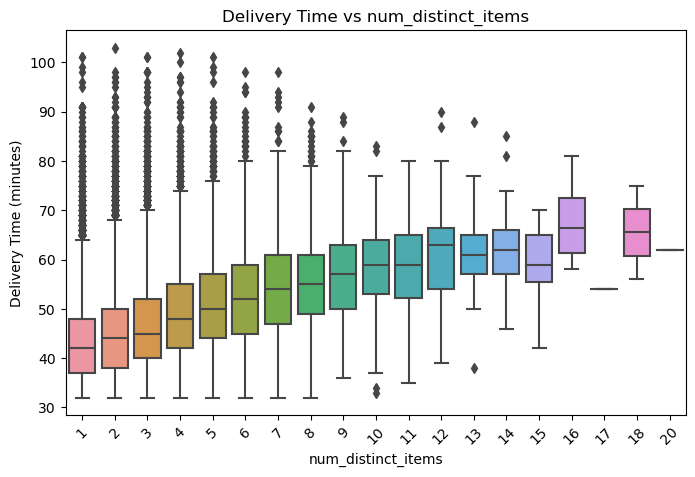

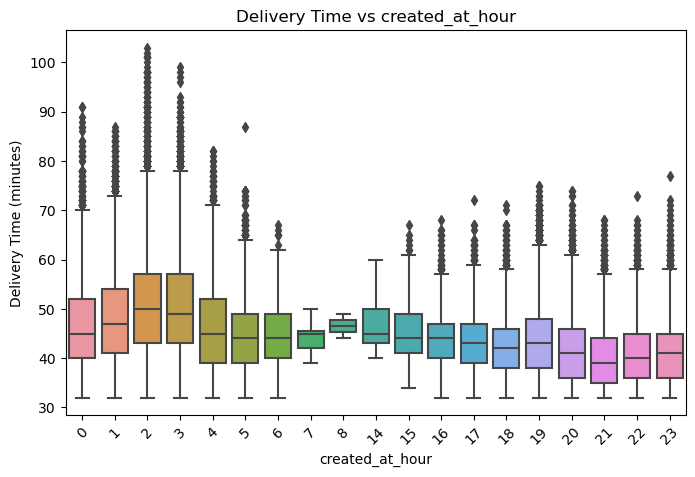

In [34]:
for i in numerical_columns_clean:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=X_train_clean[i], y=y_train)
    plt.title(f'Delivery Time vs {i}')
    plt.xlabel(i)
    plt.ylabel('Delivery Time (minutes)')
    plt.xticks(rotation=45)
    plt.show()

In [35]:
X_train_clean.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  140621.000000  140621.000000       140621.000000   140621.000000   
mean        3.204358    2697.092604            2.673548     1160.720468   
std         2.718707    1830.073210            1.624359      564.134123   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1415.000000            1.000000      799.000000   
50%         3.000000    2220.000000            2.000000     1095.000000   
75%         4.000000    3407.000000            3.000000     1395.000000   
max       411.000000   26800.000000           20.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean               44.946743           41.853763                 58.230094   
std                34.556065           32.142617                 52.670093   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           62.000000                 85.000000   
max               171.000000          154.000000                283.000000   

            distance  created_at_hour      isWeekend  
count  140621.000000    140621.000000  140621.000000  
mean       21.833790         8.473365       0.345482  
std         8.752255         8.676889       0.475527  
min         0.000000         0.000000       0.000000  
25%        15.320000         2.000000       0.000000  
50%        21.760000         3.000000       0.000000  
75%        28.120000        19.000000       1.000000  
max        83.520000        23.000000       1.000000

In [36]:
X_train_clean.shape

(140621, 13)

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [37]:
# Handle outliers
# Calculate Q1 and Q3 for total_items
Q1 = X_train_clean['total_items'].quantile(0.25)
Q3 = X_train_clean['total_items'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows where total_items is within the bounds
X_train_new = X_train_clean[(X_train_clean['total_items'] >= lower_bound) & (X_train_clean['total_items'] <= upper_bound)]

print("After removing outliers in total_items, new dataset shape:", X_train_new.shape)


After removing outliers in total_items, new dataset shape: (133864, 13)


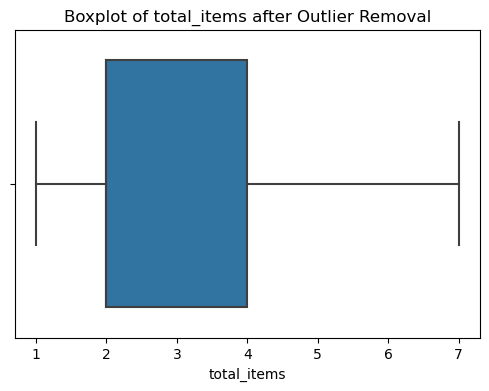

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x=X_train_new['total_items'])
plt.title('Boxplot of total_items after Outlier Removal')
plt.show()

In [39]:
X_train_new.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  133864.000000  133864.000000       133864.000000   133864.000000   
mean        2.814252    2529.692838            2.482146     1166.093886   
std         1.548468    1548.878332            1.317860      561.263463   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1395.000000            1.000000      800.000000   
50%         2.000000    2170.000000            2.000000     1095.000000   
75%         4.000000    3265.250000            3.000000     1395.000000   
max         7.000000   15435.000000            7.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          133864.000000       133864.000000             133864.000000   
mean               44.900496           41.815544                 58.120645   
std                34.527447           32.115356                 52.580299   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                65.000000           62.000000                 85.000000   
max               171.000000          154.000000                278.000000   

            distance  created_at_hour      isWeekend  
count  133864.000000    133864.000000  133864.000000  
mean       21.835061         8.499671       0.345238  
std         8.750713         8.684644       0.475448  
min         0.000000         0.000000       0.000000  
25%        15.350000         2.000000       0.000000  
50%        21.760000         3.000000       0.000000  
75%        28.080000        19.000000       1.000000  
max        83.520000        23.000000       1.000000

In [40]:
y_train_new = y_train.loc[X_train_new.index] # Ensure consistency in y_train after outlier removal from X_train

In [41]:
y_train_new.shape

(133864,)

In [42]:
X_train_original = X_train_new #Created new data frame to retain the original data frame for future reference

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [43]:
# Import libraries
from sklearn.preprocessing import StandardScaler



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [44]:
# Apply scaling to the numerical columns
numerical_columns_scale = ['total_items', 'num_distinct_items', 'subtotal', 'max_item_price', 
                  'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 
                  'created_at_hour']

categorical_columns_new = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']



In [45]:
scaler=StandardScaler()
X_train_new[numerical_columns_scale] = scaler.fit_transform(X_train_new[numerical_columns_scale])

X_test_clean[numerical_columns_scale] = scaler.transform(X_test_clean[numerical_columns_scale])# As test data is unseen data we can't fit on it

/var/folders/1t/ny42q4fx25lckm8dr89f6hm00000gn/T/ipykernel_1605/2264341734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new[numerical_columns_scale] = scaler.fit_transform(X_train_new[numerical_columns_scale])


In [46]:
# Renaming to standard naming after feature scaling
X_train_df = X_train_new

X_test_df = X_test_clean

In [47]:
X_train_df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
42111        3.0                      7            2.0    -1.171648 -0.761646   
58452        2.0                     46            5.0     1.411561  1.133281   
20644        4.0                     45            2.0     2.057363  3.454324   
79735        4.0                     45            2.0     0.119957  0.729761   
167933       1.0                      4            5.0     1.411561  3.903037   

        num_distinct_items  max_item_price  total_onshift_dashers  \
42111            -1.124665        0.327666              -0.634295   
58452             1.910569       -0.474100               1.943374   
20644             0.392952        0.505836               1.016572   
79735             0.392952        0.505836               2.377813   
167933            1.910569        2.599335              -0.026081   

        total_busy_dashers  total_outstanding_orders  distance  \
42111            -0.679290                 -0.744020 -1.398184   
58452             1.811740                  2.831477  1.454166   
20644             1.157845                  1.081766  1.495305   
79735             1.998567                  2.184845  0.448530   
167933            0.068019                  0.054761 -0.470256   

        created_at_hour  isWeekend  
42111          1.324219          0  
58452         -0.748412          1  
20644         -0.633266          0  
79735         -0.748412          1  
167933        -0.748412          0

In [48]:
X_train_df.describe()

total_items      subtotal  num_distinct_items  max_item_price  \
count  1.338640e+05  1.338640e+05        1.338640e+05    1.338640e+05   
mean  -9.511837e-17  1.433145e-17        7.415199e-17    9.469374e-17   
std    1.000004e+00  1.000004e+00        1.000004e+00    1.000004e+00   
min   -1.171648e+00 -1.633248e+00       -1.124665e+00   -2.077631e+00   
25%   -5.258455e-01 -7.325928e-01       -1.124665e+00   -6.522699e-01   
50%   -5.258455e-01 -2.322288e-01       -3.658566e-01   -1.266681e-01   
75%    7.657586e-01  4.748984e-01        3.929520e-01    4.078423e-01   
max    2.703165e+00  8.332065e+00        3.428187e+00    2.411338e+01   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count           1.338640e+05        1.338640e+05              1.338640e+05   
mean            1.061589e-18       -1.211140e-16             -4.469290e-17   
std             1.000004e+00        1.000004e+00              1.000004e+00   
min            -1.416284e+00       -1.457736e+00             -1.219485e+00   
25%            -8.080702e-01       -8.349789e-01             -7.820571e-01   
50%            -2.288187e-01       -2.122215e-01             -3.256107e-01   
75%             5.821334e-01        6.285009e-01              5.112077e-01   
max             3.652166e+00        3.493185e+00              4.181798e+00   

           distance  created_at_hour      isWeekend  
count  1.338640e+05     1.338640e+05  133864.000000  
mean  -8.657258e-17     3.361256e-17       0.345238  
std    1.000004e+00     1.000004e+00       0.475448  
min   -2.495241e+00    -9.787049e-01       0.000000  
25%   -7.410922e-01    -7.484125e-01       0.000000  
50%   -8.577728e-03    -6.332663e-01       0.000000  
75%    7.136518e-01     1.209073e+00       1.000000  
max    7.049159e+00     1.669658e+00       1.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [49]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
lr_model = LinearRegression()

In [51]:
# Train the model using the training data
lr_model.fit(X_train_df, y_train_new)

LinearRegression()

In [52]:
# Make predictions
y_pred = lr_model.predict(X_test_df)

In [53]:
# Find results for evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)


Mean Squared Error (MSE): 10.285576930495715
R-squared (R²) Score: 0.8821467515671603


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [54]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE

In [55]:
estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=8) # Selection of 8 features through RFE

In [56]:
selector=selector.fit(X_train_df,y_train_new)
selector.support_

array([False, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True])

In [57]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features) # 8 Features selected from RFE

Index(['order_protocol', 'subtotal', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'created_at_hour', 'isWeekend'],
      dtype='object')


In [58]:
X_train_rfe=X_train_df[selected_features]

X_test_rfe=X_test_df[selected_features]

In [59]:
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(133864, 8)
(35156, 8)


In [60]:
import statsmodels.api as sm

In [61]:
X_train_sm=sm.add_constant(X_train_rfe) #X_train_sm["const"]=1

X_test_sm=sm.add_constant(X_test_rfe)

In [79]:
# Building of Model 1
model1 = sm.OLS(np.array(y_train_new),X_train_sm) # Ordinary Least Squares
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 1.081e+05
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:55:39   Log-Likelihood:            -3.5193e+05
No. Observations:              133864   AIC:                         7.039e+05
Df Residuals:                  133855   BIC:                         7.040e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       47.4074      0.021   2229.475      0.000      47.366      47.449
order_protocol              -0.6765      0.006   -110.106      0.000      -0.689      -0.664
subtotal                     2.5868      0.009    273.357      0.000       2.568       2.605
total_onshift_dashers      -12.5007      0.032   -395.989      0.000     -12.563     -12.439
total_busy_dashers          -4.5503      0.031   -147.867      0.000      -4.611      -4.490
total_outstanding_orders    18.2723      0.029    631.802      0.000      18.216      18.329
distance                     4.1573      0.009    452.812      0.000       4.139       4.175
created_at_hour             -2.1803      0.010   -215.798      0.000      -2.200      -2.160
isWeekend                    1.2533      0.020     64.237      0.000       1.215       1.291
==============================================================================
Omnibus:                    46265.127   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206893.174
Skew:                           1.647   Prob(JB):                         0.00
Kurtosis:                       8.123   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# VIF for Model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

Feature        VIF
0                     const   5.380693
1            order_protocol   1.036139
2                  subtotal   1.065616
3     total_onshift_dashers  11.859220
4        total_busy_dashers  11.268902
5  total_outstanding_orders   9.953470
6                  distance   1.003065
7           created_at_hour   1.214735
8                 isWeekend   1.023913

In [63]:
# Building of Model 2 - Removal of 'total_busy_dashers' to reduce multi collinearity

X_train_sm = X_train_sm.drop(columns=['total_busy_dashers'])
X_test_sm = X_test_sm.drop(columns=['total_busy_dashers'])

In [64]:
model2 = sm.OLS(np.array(y_train_new),X_train_sm) # Ordinary Least Squares
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 1.035e+05
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:14:32   Log-Likelihood:            -3.6206e+05
No. Observations:              133864   AIC:                         7.241e+05
Df Residuals:                  133856   BIC:                         7.242e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       47.5685      0.023   2076.802      0.000      47.524      47.613
order_protocol              -0.7185      0.007   -108.535      0.000      -0.731      -0.705
subtotal                     2.5815      0.010    252.930      0.000       2.562       2.602
total_onshift_dashers      -15.0872      0.028   -532.285      0.000     -15.143     -15.032
total_outstanding_orders    16.4493      0.028    582.947      0.000      16.394      16.505
distance                     4.1436      0.010    418.464      0.000       4.124       4.163
created_at_hour             -2.2173      0.011   -203.533      0.000      -2.239      -2.196
isWeekend                    1.1399      0.021     54.213      0.000       1.099       1.181
==============================================================================
Omnibus:                    43319.880   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196840.647
Skew:                           1.525   Prob(JB):                         0.00
Kurtosis:                       8.098   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#VIF for model 2
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0                     const  5.366554
1            order_protocol  1.033926
2                  subtotal  1.065601
3     total_onshift_dashers  8.218173
4  total_outstanding_orders  8.144883
5                  distance  1.002964
6           created_at_hour  1.213991
7                 isWeekend  1.022332

In [66]:
# Build the final model with selected number of features

final_model = sm.OLS(y_train_new, X_train_sm).fit()

# Print the summary
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 1.035e+05
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:14:40   Log-Likelihood:            -3.6206e+05
No. Observations:              133864   AIC:                         7.241e+05
Df Residuals:                  133856   BIC:                         7.242e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [67]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
from scipy import stats


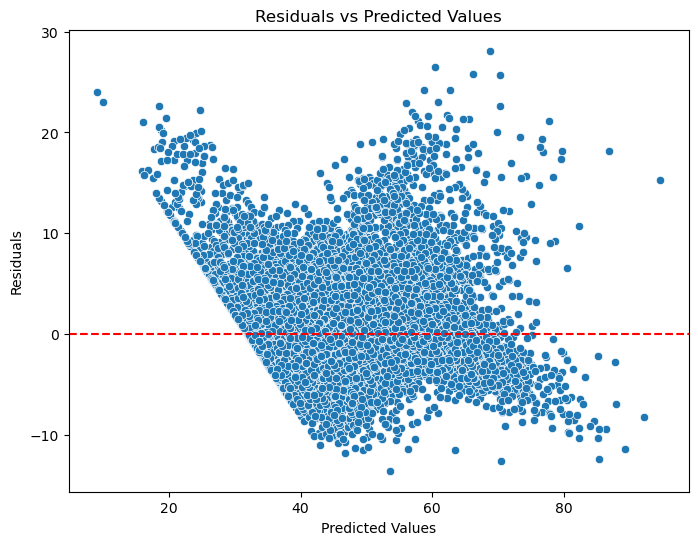

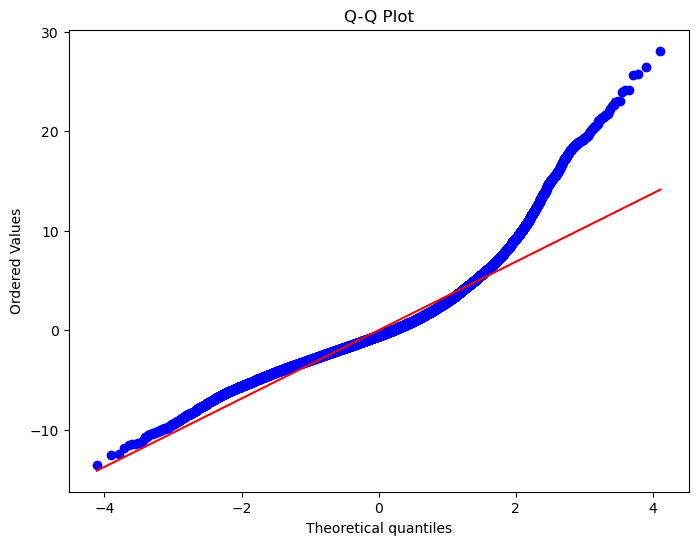

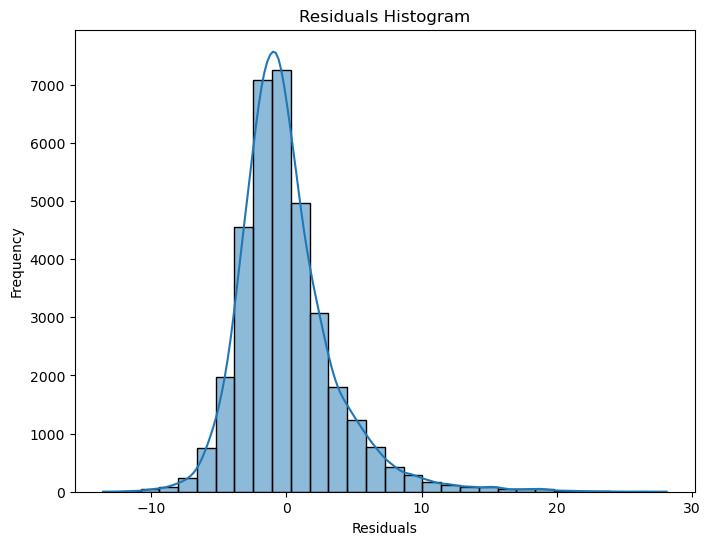

In [68]:
# Get predicted values from the final model
y_pred = final_model.predict(X_test_sm)

# Calculate residuals
residuals = y_test - y_pred

# 1. Residuals vs Predicted Values Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')  # Reference line at 0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 2. Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# 3. Residual Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

[Your inferences here:]

Residuals vs Predicted Values Plot:

Randomly scattered points around zero with no obvious pattern.

Q-Q Plot:

Points follow the diagonal line, indicating that residuals follow a normal distribution.

Residual Histogram:

A bell-shaped curve, confirming that the residuals are approximately normally distributed.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [75]:
# Compare the scaled vs unscaled features used in the final model

# Get the standard deviations of the original features (before scaling)
feature_std_devs = X_train_original[['subtotal', 'total_onshift_dashers', 'total_outstanding_orders', 'distance', 'created_at_hour']].std()

# Get the model coefficients for scaled features (exclude the constant term)
scaled_coefficients = final_model.params[2:7]  # Exclude intercept (constant)

# Unscale the coefficients by multiplying with the standard deviations
unscaled_coefficients = scaled_coefficients * feature_std_devs

# Create a DataFrame to show the unscaled coefficients alongside the original feature names
unscaled_coefficients_df = pd.DataFrame({
    'Feature': feature_std_devs.index,
    'Scaled Coefficients': scaled_coefficients,
    'Standard Deviation': feature_std_devs.values,
    'Unscaled Coefficients': unscaled_coefficients
})

print(unscaled_coefficients_df)



                                           Feature  Scaled Coefficients  \
subtotal                                  subtotal             2.581515   
total_onshift_dashers        total_onshift_dashers           -15.087194   
total_outstanding_orders  total_outstanding_orders            16.449342   
distance                                  distance             4.143596   
created_at_hour                    created_at_hour            -2.217276   

                          Standard Deviation  Unscaled Coefficients  
subtotal                            1.000004               2.581525  
total_onshift_dashers               1.000004             -15.087250  
total_outstanding_orders            1.000004              16.449404  
distance                            1.000004               4.143612  
created_at_hour                     1.000004              -2.217284  


In [ ]:
numerical_columns_scale = ['total_items', 'num_distinct_items', 'subtotal', 'max_item_price', 
                  'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 
                  'created_at_hour']

categorical_columns_new = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [76]:
# Analyze the effect of a unit change in a feature, say 'total_items'
coefficients = final_model.params
print("Final Model Coefficients:")
print(coefficients)

# Summarize the impact of each feature
for feature, coef in coefficients.items():
    print(f"Feature: {feature}, Coefficient: {coef}")
    
    # Interpretation of the impact
    if coef > 0:
        print(f"A 1 standard deviation increase in {feature} leads to an increase in delivery time of {coef:.2f} minutes.")
    else:
        print(f"A 1 standard deviation increase in {feature} leads to a decrease in delivery time of {-coef:.2f} minutes.")
    print()


Final Model Coefficients:
const                       47.568547
order_protocol              -0.718466
subtotal                     2.581515
total_onshift_dashers      -15.087194
total_outstanding_orders    16.449342
distance                     4.143596
created_at_hour             -2.217276
isWeekend                    1.139921
dtype: float64
Feature: const, Coefficient: 47.56854676548723
A 1 standard deviation increase in const leads to an increase in delivery time of 47.57 minutes.

Feature: order_protocol, Coefficient: -0.7184662288166557
A 1 standard deviation increase in order_protocol leads to a decrease in delivery time of 0.72 minutes.

Feature: subtotal, Coefficient: 2.5815152668622194
A 1 standard deviation increase in subtotal leads to an increase in delivery time of 2.58 minutes.

Feature: total_onshift_dashers, Coefficient: -15.087193630451711
A 1 standard deviation increase in total_onshift_dashers leads to a decrease in delivery time of 15.09 minutes.

Feature: total_out

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Following are the categorical variables in the data - market_id, store_primary_category, order_protocol, isWeekend, created_day_week. Of these

>Order Protocol: A 1-unit change in order protocol (e.g., switching between order placement methods) decreases the delivery time by approximately 0.72 minutes.

>isWeekend: Placing an order on the weekend increases delivery time by approximately 1.14 minutes.

>This indicates that Order Protocol and Weekend have a moderate but meaningful impact on delivery time. Even small changes in minutes are important when optimizing delivery logistics.





---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size = 0.2 means that 20% of the total dataset will be set aside as the test set, and 80% will be used as the training set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Based on the heatmap, numerical variable - Distance, has the highest correlation with the target variable.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> First, the describe() function was used to explore the distribution and summary statistics of the numerical features. Then, for selected features (total_items), calculated the first quartile (Q1) and third quartile (Q3) and identified any data points lying below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR as outliers. These outliers were removed to improve model performance and reduce skewness in the data.
Subsequently consistency was also ensured between X_train and y_train.




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Total Onshift Dashers (total_onshift_dashers):Coefficient: -15.09. Interpretation: More dashers available significantly decreases delivery time.

>Total Outstanding Orders (total_outstanding_orders): Coefficient: +16.45. Interpretation: A higher number of pending orders increases delivery time.

>Distance (distance): Coefficient: +4.14. Interpretation: Longer distances naturally increase the delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is a supervised learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

> The goal of linear regression is to find the best-fitting line by minimizing the sum of squared differences between the actual values and the predicted values — this method is called Ordinary Least Squares (OLS).




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple linear regression uses one independent variable to predict the target, fitting a straight line to the data. Multiple linear regression uses two or more independent variables to predict the target by fitting a plane or hyperplane.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function measures how wrong the model’s predictions are compared to the actual target values.

>In linear regression, the most commonly used cost function is the Mean Squared Error (MSE), which calculates the average squared difference between predicted and actual values.

>Minimize Cost Function:
The goal is to find the best model parameters (coefficients) that minimize the MSE.This minimization can be done by:

>Analytical method: Using Ordinary Least Squares (OLS) formulas.

>Iterative method: Using optimization algorithms like Gradient Descent, where the model updates parameters step-by-step to reduce the error.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
>Overfitting happens when a model learns the training data too well, including its noise, and performs poorly on new data.
Underfitting happens when a model is too simple and fails to capture the real patterns in the data.
In short, overfitting = too complex; underfitting = too simple.






---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are used to visualize the differences between the observed values and the predicted values (residuals). 

>By plotting residuals vs. predicted values, you can check for patterns that might indicate issues with the model.

>Randomly scattered residuals indicate a good fit.

>Patterns or trends (e.g., curvatures) suggest that the model is not capturing some important relationships, indicating potential non-linearity or incorrect assumptions.

>Q-Q plot (Quantile-Quantile plot) is used to check if the residuals follow a normal distribution, which is an assumption for linear regression.

>Residual plots help in identifying if the model fits the data well and if assumptions (like linearity and normality) are met. Patterns in the plot suggest areas for improvement.